## Linear Regression and Learning Curve Challenges

### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)

In [150]:
# Import Dependencies
import pandas as pd
import numpy as np
import random
import math

from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.cross_validation import train_test_split

# For display
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### <a id='1'></a>Challenge 1:

In [16]:
# Make fake data
def generate_log_model_data(n, B0, B1, epsilon_factor):
    data = []
    
    for i in range(n):
        x = random.uniform(1, 10)
        y = B0 + B1*math.log(x) + np.random.normal(0, epsilon_factor)
        data.append([y, x])
        
    return pd.DataFrame(data, columns=["y", "x"])

In [17]:
df = generate_log_model_data(100, 1.23, 4.56, 0.789)

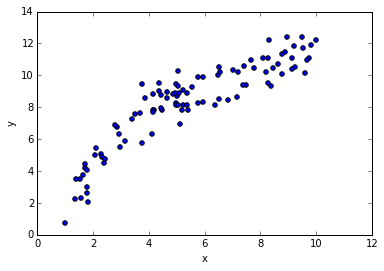

In [27]:
plt.scatter(df["x"], df["y"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [64]:
def plot_acutal_vs_predicted_scatter(model, X_for_plot):
    actual = plt.scatter(df["x"], df["y"])
    predicted = plt.plot(X_for_plot, model.predict(X_for_plot), color="red", linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [65]:
results = smf.ols(formula="y ~ np.power(x, 2)", data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     203.1
Date:                Fri, 16 Oct 2015   Prob (F-statistic):           1.26e-25
Time:                        15:06:56   Log-Likelihood:                -183.17
No. Observations:                 100   AIC:                             370.3
Df Residuals:                      98   BIC:                             375.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          5.5457      0.243     22.800      0.000         5.063     6.028
np.power(x, 2)     0.0754      0.005     14.253      0.000         0.065     0.086
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.190
Skew:                          -0.640   Prob(JB):                       0.0275
Kurtosis:                       3.298   Cond. No.                         73.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

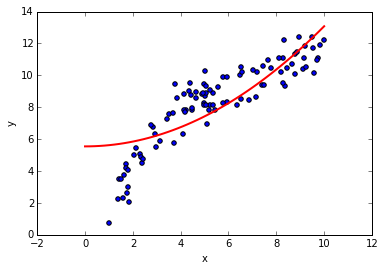

In [66]:
x_pred = pd.DataFrame(np.linspace(0, 10, 50), columns=["x"])
plot_acutal_vs_predicted_scatter(results, x_pred)

In [67]:
results = smf.ols(formula="y ~ np.log(x)", data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     880.0
Date:                Fri, 16 Oct 2015   Prob (F-statistic):           9.35e-51
Time:                        15:07:07   Log-Likelihood:                -124.27
No. Observations:                 100   AIC:                             252.5
Df Residuals:                      98   BIC:                             257.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3202      0.248      5.317      0.000         0.827     1.813
np.log(x)      4.4571      0.150     29.665      0.000         4.159     4.755
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.856
Skew:                          -0.080   Prob(JB):                        0.652
Kurtosis:                       2.576   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

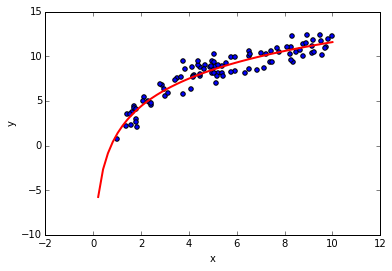

In [68]:
x_pred = pd.DataFrame(np.linspace(0, 10, 50), columns=["x"])
plot_acutal_vs_predicted_scatter(results, x_pred)

### <a id='2'></a>Challenge 2:

In [71]:
# Make fake data
def generate_quadratic_model_data(n, B0, B1, B2, epsilon_factor):
    data = []
    
    for i in range(n):
        x = random.uniform(1, 10)
        y = B0 + B1*x + B2*np.power(x, 2) + np.random.normal(0, epsilon_factor)
        data.append([y, x])
        
    return pd.DataFrame(data, columns=["y", "x"])

In [80]:
df = generate_quadratic_model_data(100, 1.23, 4.56, 0.789, 1.011)

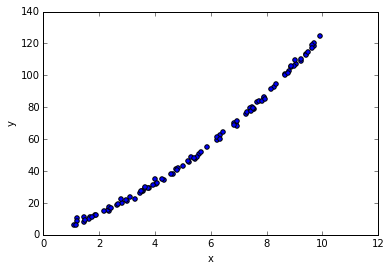

In [81]:
plt.scatter(df["x"], df["y"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [122]:
train, test = train_test_split(df, test_size=0.3, random_state=4444)
results = smf.ols(formula="y ~ x + np.power(x, 2)", data=train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.647e+04
Date:                Fri, 16 Oct 2015   Prob (F-statistic):          1.78e-102
Time:                        16:44:12   Log-Likelihood:                -103.15
No. Observations:                  70   AIC:                             212.3
Df Residuals:                      67   BIC:                             219.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          1.3511      0.606      2.228      0.029         0.141     2.561
x                  4.5504      0.250     18.237      0.000         4.052     5.048
np.power(x, 2)     0.7870      0.022     35.487      0.000         0.743     0.831
==============================================================================
Omnibus:                        2.283   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.589
Skew:                           0.336   Prob(JB):                        0.452
Kurtosis:                       3.303   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

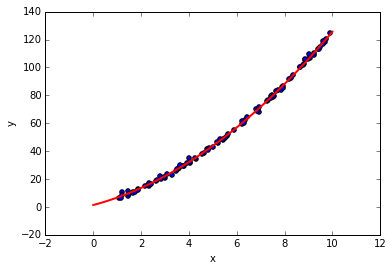

In [123]:
x_pred = pd.DataFrame(np.linspace(0, 10, 50), columns=["x"])
plot_acutal_vs_predicted_scatter(results, x_pred)

In [124]:
# Training data MSE
results.mse_resid

1.1653284536003454

In [125]:
# Test data MSE
y_pred = results.predict(test[["x"]])
mse_test = ((test["y"] - y_pred) ** 2).mean()
print(mse_test)

1.148889357983468


### <a id='3'></a>Challenge 3:

In [131]:
order = list(range(0, 8))
mse_train = []
mse_test = []
r_squared = []
aic = []

patsy_string = "y ~ 1"

for o in order:
    patsy_string += " + np.power(x, " + str(o) + ")"
    results = smf.ols(formula=patsy_string, data=train).fit()
    
    mse_train.append(results.mse_resid)
    
    y_pred = results.predict(test[["x"]])
    test_mse = ((test["y"] - y_pred) ** 2).mean()
    mse_test.append(test_mse)
    
    r_squared.append(results.rsquared)
    
    aic.append(results.aic)

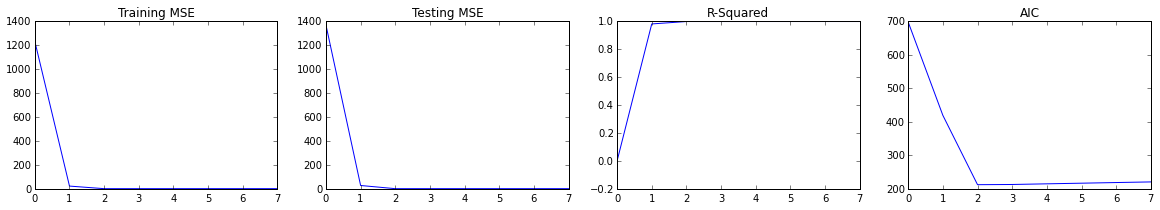

In [139]:
f = plt.figure(figsize=(20,3))

sub = plt.subplot(1, 4, 1)
plt.plot(order, mse_train)
plt.title("Training MSE")

sub = plt.subplot(1, 4, 2)
plt.plot(order, mse_test)
plt.title("Testing MSE")

sub = plt.subplot(1, 4, 3)
plt.plot(order, r_squared)
plt.title("R-Squared")

sub = plt.subplot(1, 4, 4)
plt.plot(order, aic)
plt.title("AIC")

### <a id='4'></a>Challenge 4:

In [144]:
m_list = range(5, 75, 5)
mse_train = []
mse_test = []

for m in m_list:
    results = smf.ols(formula="y ~ x + np.power(x, 2)", data=train[:m]).fit()
    
    mse_train.append(results.mse_resid)
    
    y_pred = results.predict(test[["x"]])
    test_mse = ((test["y"] - y_pred) ** 2).mean()
    mse_test.append(test_mse)

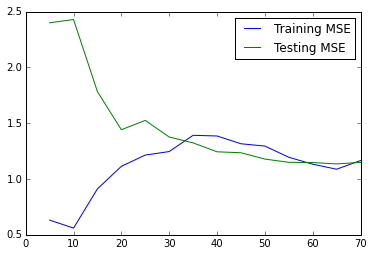

In [149]:
train_plot, = plt.plot(m_list, mse_train, label="Training MSE")
test_plot, = plt.plot(m_list, mse_test, label="Testing MSE")
plt.legend(handles=[train_plot, test_plot], loc="upper right")
plt.show()